Lesson12-1
===

Создадим примеры датасетов для демонстрации операций соединения:


In [1]:
import numpy as np
import polars as pl

np.random.seed(42)

data1 = {'user_id': np.arange(1,101),
         'name': np.random.choice(['Alice','Bob', 'Charlie', 'David'], size = 100)}
df1 = pl.DataFrame(data1)

data2 = {'user_id': np.arange(51, 151),
        'age': np.random.randint(18, 65, size=100)}

df2 = pl.DataFrame(data2)


data3 = {'user_id': np.random.randint(1,101,size=100),
        'score': np.random.randint(200, 1000, size=100)}
df3 = pl.DataFrame(data3)

display(df1.head())
display(df2.head())
display(df3.head())


user_id,name
i64,str
1,"""Charlie"""
2,"""David"""
3,"""Alice"""
4,"""Charlie"""
5,"""Charlie"""


user_id,age
i64,i64
51,35
52,43
53,61
54,51
55,27


user_id,score
i64,i64
62,672
57,350
6,614
28,497
28,810


In [2]:
#inner join

inner_joined_df = df1.join(df2,
                           on = 'user_id',
                           how = 'inner')
print(inner_joined_df)

shape: (50, 3)
┌─────────┬─────────┬─────┐
│ user_id ┆ name    ┆ age │
│ ---     ┆ ---     ┆ --- │
│ i64     ┆ str     ┆ i64 │
╞═════════╪═════════╪═════╡
│ 51      ┆ Charlie ┆ 35  │
│ 52      ┆ Bob     ┆ 43  │
│ 53      ┆ Charlie ┆ 61  │
│ 54      ┆ David   ┆ 51  │
│ 55      ┆ Charlie ┆ 27  │
│ …       ┆ …       ┆ …   │
│ 96      ┆ Bob     ┆ 45  │
│ 97      ┆ Bob     ┆ 24  │
│ 98      ┆ David   ┆ 26  │
│ 99      ┆ Bob     ┆ 25  │
│ 100     ┆ Alice   ┆ 29  │
└─────────┴─────────┴─────┘


In [3]:
# left join
left_joined_df = df1.join(df2, on = 'user_id', how='left')
print(left_joined_df)

shape: (100, 3)
┌─────────┬─────────┬──────┐
│ user_id ┆ name    ┆ age  │
│ ---     ┆ ---     ┆ ---  │
│ i64     ┆ str     ┆ i64  │
╞═════════╪═════════╪══════╡
│ 1       ┆ Charlie ┆ null │
│ 2       ┆ David   ┆ null │
│ 3       ┆ Alice   ┆ null │
│ 4       ┆ Charlie ┆ null │
│ 5       ┆ Charlie ┆ null │
│ …       ┆ …       ┆ …    │
│ 96      ┆ Bob     ┆ 45   │
│ 97      ┆ Bob     ┆ 24   │
│ 98      ┆ David   ┆ 26   │
│ 99      ┆ Bob     ┆ 25   │
│ 100     ┆ Alice   ┆ 29   │
└─────────┴─────────┴──────┘


In [4]:
# right join
right_joined_df = df1.join(df2, on = 'user_id', how='right')
print(right_joined_df)

shape: (100, 3)
┌─────────┬─────────┬─────┐
│ name    ┆ user_id ┆ age │
│ ---     ┆ ---     ┆ --- │
│ str     ┆ i64     ┆ i64 │
╞═════════╪═════════╪═════╡
│ Charlie ┆ 51      ┆ 35  │
│ Bob     ┆ 52      ┆ 43  │
│ Charlie ┆ 53      ┆ 61  │
│ David   ┆ 54      ┆ 51  │
│ Charlie ┆ 55      ┆ 27  │
│ …       ┆ …       ┆ …   │
│ null    ┆ 146     ┆ 39  │
│ null    ┆ 147     ┆ 45  │
│ null    ┆ 148     ┆ 19  │
│ null    ┆ 149     ┆ 59  │
│ null    ┆ 150     ┆ 62  │
└─────────┴─────────┴─────┘


In [5]:
#full join
full_outer_joined_df = df1.join(df2, on='user_id', how='full')
print(full_outer_joined_df)

shape: (150, 4)
┌─────────┬─────────┬───────────────┬──────┐
│ user_id ┆ name    ┆ user_id_right ┆ age  │
│ ---     ┆ ---     ┆ ---           ┆ ---  │
│ i64     ┆ str     ┆ i64           ┆ i64  │
╞═════════╪═════════╪═══════════════╪══════╡
│ 51      ┆ Charlie ┆ 51            ┆ 35   │
│ 52      ┆ Bob     ┆ 52            ┆ 43   │
│ 53      ┆ Charlie ┆ 53            ┆ 61   │
│ 54      ┆ David   ┆ 54            ┆ 51   │
│ 55      ┆ Charlie ┆ 55            ┆ 27   │
│ …       ┆ …       ┆ …             ┆ …    │
│ 37      ┆ David   ┆ null          ┆ null │
│ 39      ┆ Alice   ┆ null          ┆ null │
│ 41      ┆ Charlie ┆ null          ┆ null │
│ 10      ┆ Bob     ┆ null          ┆ null │
│ 14      ┆ Charlie ┆ null          ┆ null │
└─────────┴─────────┴───────────────┴──────┘


In [6]:
#cross join

df_brands = pl.DataFrame({'brand': ['lacoste','prada', 'calvin klein']})
df_sizes = pl.DataFrame({'sizes':['S','M','L']})

cross_joined_df = df_brands.join(df_sizes, how='cross')
print(cross_joined_df)

shape: (9, 2)
┌──────────────┬───────┐
│ brand        ┆ sizes │
│ ---          ┆ ---   │
│ str          ┆ str   │
╞══════════════╪═══════╡
│ lacoste      ┆ S     │
│ lacoste      ┆ M     │
│ lacoste      ┆ L     │
│ prada        ┆ S     │
│ prada        ┆ M     │
│ prada        ┆ L     │
│ calvin klein ┆ S     │
│ calvin klein ┆ M     │
│ calvin klein ┆ L     │
└──────────────┴───────┘


In [7]:
#semi join

semi_joined_df = df1.join(df2, on='user_id', how='semi')
print(f"Semi Join Result {semi_joined_df.shape}:\n", semi_joined_df.head())

Semi Join Result (50, 2):
 shape: (5, 2)
┌─────────┬─────────┐
│ user_id ┆ name    │
│ ---     ┆ ---     │
│ i64     ┆ str     │
╞═════════╪═════════╡
│ 51      ┆ Charlie │
│ 52      ┆ Bob     │
│ 53      ┆ Charlie │
│ 54      ┆ David   │
│ 55      ┆ Charlie │
└─────────┴─────────┘


In [8]:
semi_joined_df.shape

(50, 2)

In [9]:
# anti join 

anti_joined_df = df1.join(df2, on = 'user_id', how='anti')
print(anti_joined_df)

shape: (50, 2)
┌─────────┬─────────┐
│ user_id ┆ name    │
│ ---     ┆ ---     │
│ i64     ┆ str     │
╞═════════╪═════════╡
│ 1       ┆ Charlie │
│ 2       ┆ David   │
│ 3       ┆ Alice   │
│ 4       ┆ Charlie │
│ 5       ┆ Charlie │
│ …       ┆ …       │
│ 46      ┆ David   │
│ 47      ┆ David   │
│ 48      ┆ Charlie │
│ 49      ┆ Bob     │
│ 50      ┆ Bob     │
└─────────┴─────────┘


In [10]:
# asof join
df_q = pl.DataFrame({
    "time": ["2024-01-01 10:00", "2024-01-01 10:02", "2024-01-01 10:05"],
    "quantity": [10, 20, 30]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time')

df_p = pl.DataFrame({
    "time": ["2024-01-01 10:01", "2024-01-01 10:03", "2024-01-01 10:06"],
    "price": [100, 200, 300]
}).with_columns(pl.col("time").str.strptime(pl.Datetime)).sort('time')


display(df_p)
display(df_q)

time,price
datetime[μs],i64
2024-01-01 10:01:00,100
2024-01-01 10:03:00,200
2024-01-01 10:06:00,300


time,quantity
datetime[μs],i64
2024-01-01 10:00:00,10
2024-01-01 10:02:00,20
2024-01-01 10:05:00,30


In [11]:
result = df_q.join_asof(df_p, on='time')

In [12]:
print(result)

shape: (3, 3)
┌─────────────────────┬──────────┬───────┐
│ time                ┆ quantity ┆ price │
│ ---                 ┆ ---      ┆ ---   │
│ datetime[μs]        ┆ i64      ┆ i64   │
╞═════════════════════╪══════════╪═══════╡
│ 2024-01-01 10:00:00 ┆ 10       ┆ null  │
│ 2024-01-01 10:02:00 ┆ 20       ┆ 100   │
│ 2024-01-01 10:05:00 ┆ 30       ┆ 200   │
└─────────────────────┴──────────┴───────┘


In [13]:
df_q.join_asof(df_p, on='time', strategy='forward')

time,quantity,price
datetime[μs],i64,i64
2024-01-01 10:00:00,10,100
2024-01-01 10:02:00,20,200
2024-01-01 10:05:00,30,300


In [14]:
df_q.join_asof(df_p, on='time', strategy='nearest')

time,quantity,price
datetime[μs],i64,i64
2024-01-01 10:00:00,10,100
2024-01-01 10:02:00,20,200
2024-01-01 10:05:00,30,300


In [15]:
# tolerance
from datetime import timedelta
result = df_q .join_asof(df_p, on="time", tolerance=timedelta(minutes=1))
print(result)

shape: (3, 3)
┌─────────────────────┬──────────┬───────┐
│ time                ┆ quantity ┆ price │
│ ---                 ┆ ---      ┆ ---   │
│ datetime[μs]        ┆ i64      ┆ i64   │
╞═════════════════════╪══════════╪═══════╡
│ 2024-01-01 10:00:00 ┆ 10       ┆ null  │
│ 2024-01-01 10:02:00 ┆ 20       ┆ 100   │
│ 2024-01-01 10:05:00 ┆ 30       ┆ null  │
└─────────────────────┴──────────┴───────┘


In [16]:
# Merge_sorted
df11 = pl.DataFrame({"Name": ["John", "Joseph", "Albert"],
                   "Age": [18,15,29]}).sort("Age")

df12 = pl.DataFrame({"Name":["Ema", "Andrew", "Michel"],
                   "Age": [22, 30, 16]}).sort("Age")

df13 = df11.merge_sorted(df12, "Age")
print(df13)

shape: (6, 2)
┌────────┬─────┐
│ Name   ┆ Age │
│ ---    ┆ --- │
│ str    ┆ i64 │
╞════════╪═════╡
│ Joseph ┆ 15  │
│ Michel ┆ 16  │
│ John   ┆ 18  │
│ Ema    ┆ 22  │
│ Albert ┆ 29  │
│ Andrew ┆ 30  │
└────────┴─────┘


In [17]:
# Merge_sorted
df11 = pl.DataFrame({"Name": ["John", "Joseph", "Albert"],
                   "Age": [22,15,29]}).sort("Age")

df12 = pl.DataFrame({"Name":["Ema", "Andrew", "Michel"],
                   "Age": [22, 30, 16]}).sort("Age")

df13 = df11.merge_sorted(df12, "Age")
print(df13)

shape: (6, 2)
┌────────┬─────┐
│ Name   ┆ Age │
│ ---    ┆ --- │
│ str    ┆ i64 │
╞════════╪═════╡
│ Joseph ┆ 15  │
│ Michel ┆ 16  │
│ John   ┆ 22  │
│ Ema    ┆ 22  │
│ Albert ┆ 29  │
│ Andrew ┆ 30  │
└────────┴─────┘


In [18]:
#Конкатенация

#Вертикальная конкатенация

df21 = pl.DataFrame({
    "Name": ["Alice", "Bob"],
    "Age": [25, 30]
})

df22 = pl.DataFrame({
    "Name": ["Charlie", "David"],
    "Age": [35, 40]
})

df_vertical = pl.concat([df21, df22])
print(df_vertical)

shape: (4, 2)
┌─────────┬─────┐
│ Name    ┆ Age │
│ ---     ┆ --- │
│ str     ┆ i64 │
╞═════════╪═════╡
│ Alice   ┆ 25  │
│ Bob     ┆ 30  │
│ Charlie ┆ 35  │
│ David   ┆ 40  │
└─────────┴─────┘


В отличие от пандас, в поларс имена и количество колонок должно совпадать 

In [19]:
# Горизонтальная конкатенация

df23 = pl.DataFrame({
    "City": ["New York", "Los Angeles"],
    "Occupation": ["Engineer", "Doctor"]
})

df_horizontal = pl.concat([df21, df23], how='horizontal')

In [20]:
print(df_horizontal)

shape: (2, 4)
┌───────┬─────┬─────────────┬────────────┐
│ Name  ┆ Age ┆ City        ┆ Occupation │
│ ---   ┆ --- ┆ ---         ┆ ---        │
│ str   ┆ i64 ┆ str         ┆ str        │
╞═══════╪═════╪═════════════╪════════════╡
│ Alice ┆ 25  ┆ New York    ┆ Engineer   │
│ Bob   ┆ 30  ┆ Los Angeles ┆ Doctor     │
└───────┴─────┴─────────────┴────────────┘


In [21]:
#Диагональная конкатенация
df_diagonal = pl.concat(
    [
        df21,
        df23,
    ],
    how="diagonal",
)
print(df_diagonal)

shape: (4, 4)
┌───────┬──────┬─────────────┬────────────┐
│ Name  ┆ Age  ┆ City        ┆ Occupation │
│ ---   ┆ ---  ┆ ---         ┆ ---        │
│ str   ┆ i64  ┆ str         ┆ str        │
╞═══════╪══════╪═════════════╪════════════╡
│ Alice ┆ 25   ┆ null        ┆ null       │
│ Bob   ┆ 30   ┆ null        ┆ null       │
│ null  ┆ null ┆ New York    ┆ Engineer   │
│ null  ┆ null ┆ Los Angeles ┆ Doctor     │
└───────┴──────┴─────────────┴────────────┘


In [22]:
#melt

df = pl.DataFrame({
    "Year": [2020, 2021],
    "Product A": [100, 150],
    "Product B": [90, 120]
})

print(df)

shape: (2, 3)
┌──────┬───────────┬───────────┐
│ Year ┆ Product A ┆ Product B │
│ ---  ┆ ---       ┆ ---       │
│ i64  ┆ i64       ┆ i64       │
╞══════╪═══════════╪═══════════╡
│ 2020 ┆ 100       ┆ 90        │
│ 2021 ┆ 150       ┆ 120       │
└──────┴───────────┴───────────┘


In [23]:
#melt id depricated
melted_df = df.unpivot(index = "Year",
                   on = ["Product A", "Product B"],
                   variable_name = "Product", value_name="Sales")
print(melted_df)

shape: (4, 3)
┌──────┬───────────┬───────┐
│ Year ┆ Product   ┆ Sales │
│ ---  ┆ ---       ┆ ---   │
│ i64  ┆ str       ┆ i64   │
╞══════╪═══════════╪═══════╡
│ 2020 ┆ Product A ┆ 100   │
│ 2021 ┆ Product A ┆ 150   │
│ 2020 ┆ Product B ┆ 90    │
│ 2021 ┆ Product B ┆ 120   │
└──────┴───────────┴───────┘


Решение задач
---

In [24]:
#Что делает этот код и сколько строк будет в результирующей таблице?
df_employees = pl.DataFrame({
    "employee_id": [1, 2, 3, 4],
    "name": ["Alice", "Bob", "Charlie", "David"],
    "department_id": [101, 102, 103, 101]
})

df_departments = pl.DataFrame({
    "department_id": [101, 102, 104],
    "department_name": ["HR", "IT", "Finance"]
})

result = df_employees.join(df_departments, on="department_id", how="left")


In [25]:
print(result)

shape: (4, 4)
┌─────────────┬─────────┬───────────────┬─────────────────┐
│ employee_id ┆ name    ┆ department_id ┆ department_name │
│ ---         ┆ ---     ┆ ---           ┆ ---             │
│ i64         ┆ str     ┆ i64           ┆ str             │
╞═════════════╪═════════╪═══════════════╪═════════════════╡
│ 1           ┆ Alice   ┆ 101           ┆ HR              │
│ 2           ┆ Bob     ┆ 102           ┆ IT              │
│ 3           ┆ Charlie ┆ 103           ┆ null            │
│ 4           ┆ David   ┆ 101           ┆ HR              │
└─────────────┴─────────┴───────────────┴─────────────────┘


In [26]:
#Где ошибка в коде?

df_students = pl.DataFrame({
    "student_id": [1, 2, 3],
    "student_name": ["Alice", "Bob", "Charlie"]
})

df_grades = pl.DataFrame({
    "id": [1, 2, 4],
    "grade": ["A", "B", "C"]
})

#result = df_students.join(df_grades, on="student_id", how="inner")
df_students.join(df_grades, left_on = 'student_id',
                 right_on='id', how='inner')

student_id,student_name,grade
i64,str,str
1,"""Alice""","""A"""
2,"""Bob""","""B"""


Lesson 12-2
==
Polars: бенчмарки и LazyFrame
---

In [27]:
# ленивые вичисления


df = pl.DataFrame({
    "name": ["Alice", "Bob", "Charlie"],
    "age": [25, 30, 35],
    "city": ["New York", "Los Angeles", "Chicago"]
})


lazy_df = df.lazy()

In [28]:
lazy_df

In [29]:
# чтение из файла
lazy_df_from_csv = pl.read_csv("ecommerce_data/events.csv").lazy()

In [30]:
lazy_df_from_csv

In [31]:
# создание с нуля
lazy_df_from_scratch = pl.DataFrame({
    "id": [1, 2, 3],
    "value": [10, 20, 30]
}).lazy()

In [32]:
#scan

lzdf=pl.scan_csv("ecommerce_data/events.csv")

In [33]:
#number of rows
lzdf.select(pl.len()).collect()

len
u32
885129


In [34]:
#Преобразования LazyFrame

In [35]:
result_df = (
    pl.scan_csv("ecommerce_data/events.csv")
    .select(['brand', 'event_type', 'price'])
    .filter(pl.col('event_type')=='view')
    .group_by('brand').agg(pl.col('price').mean().alias('average_price'))
).collect()

print(result_df)

shape: (1_000, 2)
┌────────────┬───────────────┐
│ brand      ┆ average_price │
│ ---        ┆ ---           │
│ str        ┆ f64           │
╞════════════╪═══════════════╡
│ andis      ┆ 196.846585    │
│ rekam      ┆ 56.113913     │
│ lexmark    ┆ 135.403001    │
│ leatherman ┆ 116.655412    │
│ wolta      ┆ 41.48875      │
│ …          ┆ …             │
│ dsk        ┆ 54.6          │
│ neoline    ┆ 209.928587    │
│ hammer     ┆ 133.627622    │
│ nillkin    ┆ 20.0          │
│ apc        ┆ 1308.246359   │
└────────────┴───────────────┘


Визуализация планов выполнения в Polars
---

```brew install graphviz```

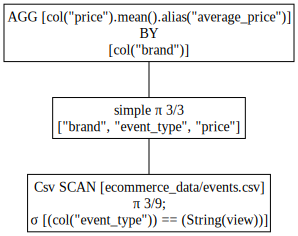

In [36]:
result_df = (
    pl.scan_csv("ecommerce_data/events.csv")
    .select(['brand', 'event_type', 'price'])
    .filter(pl.col('event_type') == 'view')
    .group_by("brand").agg([pl.col("price").mean().alias("average_price")])
)

result_df.show_graph()

In [37]:
#Параметр streaming
lazy_df = pl.scan_csv("ecommerce_data/events.csv").filter(pl.col("price") > 100)

result_df = lazy_df.collect(streaming=True)


In [38]:
%%timeit

import pandas as pd

df = pd.read_csv("ecommerce_data/events.csv")

df_selected = df[['brand', 'event_type', 'price']]

df_filtered = df_selected[df_selected['event_type'] == 'view']

result_df = df_filtered.groupby('brand')['price'].mean().reset_index(name='average_price')

print(result_df)



          brand  average_price
0        a-data      20.235833
1    accesstyle      24.700000
2        accord      51.060904
3          acct      26.350000
4       acecamp      39.553158
..          ...            ...
994         zmi      61.270000
995    zoweetek      35.620000
996       zowie      84.577500
997         zte      55.175234
998       zyxel     207.394491

[999 rows x 2 columns]
          brand  average_price
0        a-data      20.235833
1    accesstyle      24.700000
2        accord      51.060904
3          acct      26.350000
4       acecamp      39.553158
..          ...            ...
994         zmi      61.270000
995    zoweetek      35.620000
996       zowie      84.577500
997         zte      55.175234
998       zyxel     207.394491

[999 rows x 2 columns]
          brand  average_price
0        a-data      20.235833
1    accesstyle      24.700000
2        accord      51.060904
3          acct      26.350000
4       acecamp      39.553158
..          ...       

In [40]:
%%timeit

import polars as pl

result_df = (
    pl.scan_csv("ecommerce_data/events.csv")
    .select(['brand', 'event_type', 'price'])
    .filter(pl.col('event_type') == 'view')
    .group_by("brand").agg([pl.col("price").mean().alias("average_price")])
).collect()

print(result_df)



shape: (1_000, 2)
┌───────────┬───────────────┐
│ brand     ┆ average_price │
│ ---       ┆ ---           │
│ str       ┆ f64           │
╞═══════════╪═══════════════╡
│ xp-pen    ┆ 93.639792     │
│ nakatomi  ┆ 31.315469     │
│ metalloni ┆ 20.95         │
│ aqc       ┆ 15.450215     │
│ heddy     ┆ 20.354186     │
│ …         ┆ …             │
│ polaris   ┆ 71.938672     │
│ resmed    ┆ 30.161214     │
│ lumiix    ┆ 4.71          │
│ sparco    ┆ 78.95         │
│ fibaro    ┆ 76.03         │
└───────────┴───────────────┘
shape: (1_000, 2)
┌───────────┬───────────────┐
│ brand     ┆ average_price │
│ ---       ┆ ---           │
│ str       ┆ f64           │
╞═══════════╪═══════════════╡
│ huter     ┆ 264.027816    │
│ camping   ┆ 125.650625    │
│ rivacase  ┆ 40.065051     │
│ first     ┆ 32.578909     │
│ samsonite ┆ 51.135        │
│ …         ┆ …             │
│ romoss    ┆ 51.94975      │
│ zeon      ┆ 44.566667     │
│ momax     ┆ 44.856477     │
│ sharp     ┆ 183.596122    │
│ wh

In [41]:
#Работа с несколькими файлами

import glob
file_list = glob.glob('group_csvs/*.csv')
print(file_list)





['group_csvs/brands2.csv', 'group_csvs/brands3.csv', 'group_csvs/brands1.csv']


In [45]:
#Цикл в жадном режиме
df_list = list()

for file in file_list:
    df_list.append(pl.read_csv(file))
df = pl.concat(df_list)

output = (
    df
    .group_by('brand')
    .agg(pl.col('price').mean().alias("Average price"))
)
print(output)

shape: (5, 2)
┌────────┬───────────────┐
│ brand  ┆ Average price │
│ ---    ┆ ---           │
│ str    ┆ f64           │
╞════════╪═══════════════╡
│ BrandA ┆ 11.75         │
│ BrandB ┆ 22.333333     │
│ BrandC ┆ 32.333333     │
│ BrandD ┆ 21.5          │
│ BrandE ┆ 42.333333     │
└────────┴───────────────┘


In [47]:
#Цикл в ленивом режиме

#Цикл в жадном режиме
df_list = list()

for file in file_list:
    df_list.append(pl.scan_csv(file))
df = pl.concat(df_list)

output = (
    df
    .group_by('brand')
    .agg(pl.col('price').mean().alias("Average price"))
).collect()
print(output)

shape: (5, 2)
┌────────┬───────────────┐
│ brand  ┆ Average price │
│ ---    ┆ ---           │
│ str    ┆ f64           │
╞════════╪═══════════════╡
│ BrandB ┆ 22.333333     │
│ BrandA ┆ 11.75         │
│ BrandE ┆ 42.333333     │
│ BrandD ┆ 21.5          │
│ BrandC ┆ 32.333333     │
└────────┴───────────────┘


In [48]:
#Упрощение

output = (pl.scan_csv('group_csvs/*.csv')
         .group_by('brand')
         .agg(pl.col('price').mean().alias('Average price'))
         ).collect(streaming=True)

In [49]:
output

brand,Average price
str,f64
"""BrandC""",32.333333
"""BrandD""",21.5
"""BrandA""",11.75
"""BrandB""",22.333333
"""BrandE""",42.333333


Решение задач
--


In [53]:
# Исправьте код:


lazy_df = pl.scan_csv("data.csv")

result = lazy_df.filter(pl.col("name") == "Alice").select(["id", "sales"])
result_df = result.collect()
print(result_df)




shape: (2, 2)
┌─────┬───────┐
│ id  ┆ sales │
│ --- ┆ ---   │
│ i64 ┆ i64   │
╞═════╪═══════╡
│ 1   ┆ 200   │
│ 3   ┆ 300   │
└─────┴───────┘
